In [1]:
import simulation
import utils
import HminLower
import shannonLower
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import json
import ShannonEAT

## Recreating results on Shannon

In [2]:
alphas = np.linspace(0.03, 1, 70)
betas = np.linspace(0.3, 0.9, 70)
vals = np.zeros((70, 70))
res = {'alphas': alphas, 'betas': betas, 'probas': []}

for i in range(70):
    for j in range(70):
        a = (alphas[i], betas[j])
        deltas, p = simulation.doSimul(a, 1/2, '3', 100000, 0.94)
        val = shannonLower.runOpti(deltas, p[0], 1/2, impl=1)
        vals[i,j] = val
        res['probas'].append(p)

res['vals'] = vals
with open("Results/Shannon3.json", 'w') as f:
    json.dump(res, f)

TypeError: Object of type ndarray is not JSON serializable

/var/folders/c4/sgxdk2g56dx90j4nw9824_sw0000gn/T/ipykernel_25101/1070356245.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  top = cm.get_cmap('Blues_r', n_blues)
/var/folders/c4/sgxdk2g56dx90j4nw9824_sw0000gn/T/ipykernel_25101/1070356245.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  bottom = cm.get_cmap('Reds', n_reds)


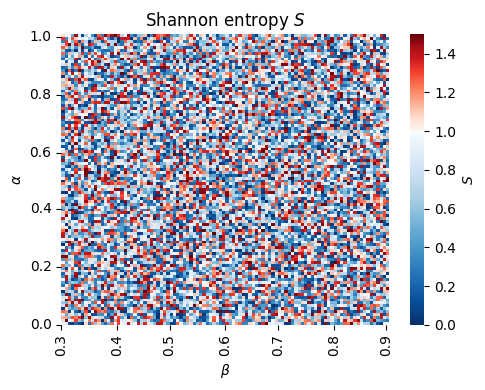

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib import cm

# Your custom colormap
n_blues = 400
n_reds = 200
top = cm.get_cmap('Blues_r', n_blues)
bottom = cm.get_cmap('Reds', n_reds)
newcolors = np.vstack((top(np.linspace(0, 1, n_blues)),
                       bottom(np.linspace(0, 1, n_reds))))
newcmp = ListedColormap(newcolors)

# Example data setup (replace with your real data)
# alphas and betas must match vals.shape

# Ticks
alpha_ticks = np.arange(0.0, 1.01, 0.2)
beta_ticks = np.arange(0.3, 0.91, 0.1)
alpha_tick_indices = [np.abs(alphas - a).argmin() for a in alpha_ticks]
beta_tick_indices = [np.abs(betas - b).argmin() for b in beta_ticks]

# Plot
plt.figure(figsize=(5, 4))
ax = sns.heatmap(vals,
                 xticklabels=beta_tick_indices,
                 yticklabels=alpha_tick_indices,
                 cmap=newcmp,             # pass the actual colormap object here!
                 vmin=0.0, vmax=1.5,
                 cbar_kws={'label': '$S$'})

# Tick labels
ax.set_xticks(beta_tick_indices)
ax.set_xticklabels([f"{b:.1f}" for b in beta_ticks])
ax.set_yticks(alpha_tick_indices)
ax.set_yticklabels([f"{a:.1f}" for a in alpha_ticks])
ax.invert_yaxis()

plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')
plt.title(r'Shannon entropy $S$')

plt.tight_layout()
plt.show()


In [8]:
vals

array([[0.57872713, 0.58735257, 0.59511038, ..., 0.62144274, 0.61342499,
        0.59117982],
       [0.56943351, 0.57699268, 0.60770676, ..., 0.6287446 , 0.61780258,
        0.59910602],
       [0.59454569, 0.60118443, 0.61698696, ..., 0.64248403, 0.62801867,
        0.6168824 ],
       ...,
       [0.41207254, 0.4326703 , 0.45323148, ..., 0.77520978, 0.76096013,
        0.75501733],
       [0.40353261, 0.42740072, 0.44214392, ..., 0.7644335 , 0.75241092,
        0.74747645],
       [0.38890985, 0.40928065, 0.42861162, ..., 0.75635639, 0.74456315,
        0.74241824]], shape=(70, 70))

## Comparing Shannon and Hmin -- Same setup as from paper

In [ ]:
res1 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.getProbas(alpha, 0.77, 1e-6, '1', False)
    val = shannonLower.runOpti(delta, p, 7/8)

    res1['deltas'].append(delta)
    res1['vals'].append(val)
    res1['probas'].append(p)

with open('Results/Shannon1_077_NoDT.json', 'w') as f:
    json.dump(res1, f)

In [ ]:
res2 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.getProbas(alpha, 0.77, 1e-6, '1', False)
    val = shannonLower.runOpti(delta, p, 7/8)

    res2['deltas'].append(delta)
    res2['vals'].append(val)
    res2['probas'].append(p)

with open('Results/Shannon1_077_DT.json', 'w') as f:
    json.dump(res2, f)

In [ ]:
res3 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.getProbas(alpha, 0.77, 1e-6, '1', False)
    val = HminLower.getHmin(p, delta, 7/8)

    res3['deltas'].append(delta)
    res3['vals'].append(val)
    res3['probas'].append(p)

with open('Results/Hmin1_077_NoDT.json', 'w') as f:
    json.dump(res3, f)

In [ ]:
res4 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.getProbas(alpha, 0.77, 1e-6, '1', True)
    val = HminLower.getHmin(p, delta, 7/8)

    res4['deltas'].append(delta)
    res4['vals'].append(val)
    res4['probas'].append(p)

with open('Results/Hmin1_077_DT.json', 'w') as f:
    json.dump(res4, f)

In [ ]:
res5 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.getProbas(alpha, 1, 0, '1', False)
    val = shannonLower.runOpti(delta, p, 7/8)

    res5['deltas'].append(delta)
    res5['vals'].append(val)
    res5['probas'].append(p)

with open('Results/Shannon1_1_NoDT.json', 'w') as f:
    json.dump(res5, f)

In [ ]:
res6 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.getProbas(alpha, 1, 0, '1', False)
    val = HminLower.getHmin(p, delta, 7/8)

    res6['deltas'].append(delta)
    res6['vals'].append(val)
    res6['probas'].append(p)

with open('Results/Hmin1_1_NoDT.json', 'w') as f:
    json.dump(res6, f)

In [8]:
alphas = [sqrt(alpha) for alpha in alphas]

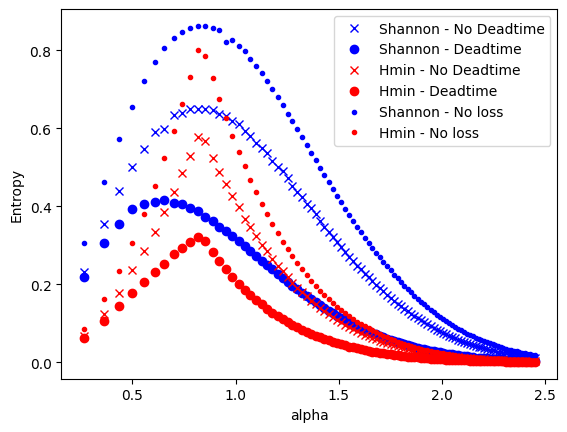

In [9]:
plt.figure()
plt.plot(alphas, res1['vals'], 'bx', label="Shannon - No Deadtime")
plt.plot(alphas, res2['vals'], 'bo', label="Shannon - Deadtime")
plt.plot(alphas, res3['vals'], 'rx', label="Hmin - No Deadtime")
plt.plot(alphas, res4['vals'], 'ro', label="Hmin - Deadtime")
plt.plot(alphas, res5['vals'], 'b.', label="Shannon - No loss")
plt.plot(alphas, res6['vals'], 'r.', label="Hmin - No loss")
plt.xlabel("alpha")
plt.ylabel("Entropy")
plt.legend()

In [ ]:
res_1 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.getProbas(alpha, 0.77, 1e-6, '2', False)
    val = shannonLower.runOpti(delta, p, 1/2)

    res_1['deltas'].append(delta)
    res_1['vals'].append(val)
    res_1['probas'].append(p)

with open('Results/Shannon2_077_NoDT.json', 'w') as f:
    json.dump(res_1, f)

In [ ]:
res_2 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.getProbas(alpha, 0.77, 1e-6, '2', True)
    val = shannonLower.runOpti(delta, p[0], 1/2)

    res_2['deltas'].append(delta)
    res_2['vals'].append(val)
    res_2['probas'].append(p)

with open('Results/Shannon2_077_DT.json', 'w') as f:
    json.dump(res_2, f)

In [ ]:
res_3 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.getProbas(alpha, 0.77, 1e-6, '2', False)
    val = HminLower.getHmin(p[0], delta, 1/2)

    res_3['deltas'].append(delta)
    res_3['vals'].append(val)
    res_3['probas'].append(p)

with open('Results/Hmin2_077_NoDT.json', 'w') as f:
    json.dump(res_3, f)

In [ ]:
res_4 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.getProbas(alpha, 0.77, 1e-6, '2', True)
    val = HminLower.getHmin(p[0], delta, 1/2)

    res_4['deltas'].append(delta)
    res_4['vals'].append(val)
    res_4['probas'].append(p)

with open('Results/Hmin2_077_DT.json', 'w') as f:
    json.dump(res_4, f)

In [ ]:
res_5 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.getProbas(alpha, 1, 0, '2', False)
    val = shannonLower.runOpti(delta, p, 1/2)

    res_5['deltas'].append(delta)
    res_5['vals'].append(val)
    res_5['probas'].append(p)

with open('Results/Shannon2_1_NoDT.json', 'w') as f:
    json.dump(res_5, f)

In [ ]:
res_6 = {'deltas': [], 'probas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    delta, p = simulation.getProbas(alpha, 1, 0, '2', False)
    val = HminLower.getHmin(p, delta, 1/2)

    res_6['deltas'].append(delta)
    res_6['vals'].append(val)
    res_6['probas'].append(p)

with open('Results/Hmin2_1_NoDT.json', 'w') as f:
    json.dump(res_6, f)

/Users/thomasbrunet/Desktop/MASTERTHESIS/SDPLearning/HminLower.py:48: RuntimeWarning: invalid value encountered in log2
  return -np.log2(prob.value)


In [16]:
alphas = [sqrt(alpha) for alpha in alphas]

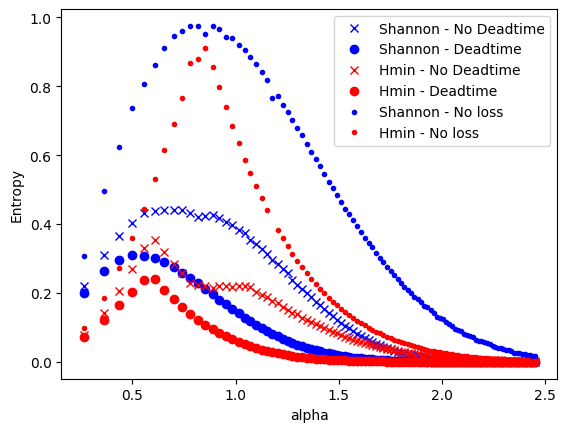

In [17]:
plt.figure()
plt.plot(alphas, res_1['vals'], 'bx', label="Shannon - No Deadtime")
plt.plot(alphas, res_2['vals'], 'bo', label="Shannon - Deadtime")
plt.plot(alphas, res_3['vals'], 'rx', label="Hmin - No Deadtime")
plt.plot(alphas, res_4['vals'], 'ro', label="Hmin - Deadtime")
plt.plot(alphas, res_5['vals'], 'b.', label="Shannon - No loss")
plt.plot(alphas, res_6['vals'], 'r.', label="Hmin - No loss")
plt.xlabel("alpha")
plt.ylabel("Entropy")
plt.legend()

## Comparing Shannon and EAT

In [4]:
res1e = {'deltas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    ps = []
    delta = 0.0
    for i in range(5):
        delta, p = simulation.doSimul(alpha, 7/8, '1', 100000, 0.77, False)
        ps.append(p[0])
    val = ShannonEAT.getH(ps, 100000, delta, 7/8)
    res1e['vals'].append(val)
    res1e['deltas'].append(delta)

with open('Results/ShannonEAT1_077_NoDT.json', 'w') as f:
    json.dump(res1e, f)

In [5]:
res2e = {'deltas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    ps = []
    delta = 0.0
    for i in range(5):
        delta, p = simulation.doSimul(alpha, 7/8, '1', 100000, 0.77, True)
        ps.append(p[0])
    val = ShannonEAT.getH(ps, 100000, delta, 7/8)
    res2e['vals'].append(val)
    res2e['deltas'].append(delta)

with open('Results/ShannonEAT1_077_DT.json', 'w') as f:
    json.dump(res2e, f)

In [4]:
alpha = sqrt(5)
delta, p = simulation.doSimul(alpha, 7/8, '1', 1000, 0.77, True)
print(p[0])
shannonLower.runOpti(delta, p[0], 7/8)

{0: {0: 0.0, 1: 0.0}, 1: {0: 0.0, 1: 0.32967032967032966}, 2: {0: 1.0, 1: 0.6703296703296704}}


np.float64(0.00925505504850932)

In [5]:
alpha = sqrt(0.3)
ps = []
delta = 0.0
for i in range(3):
    delta, p = simulation.doSimul(alpha, 7/8, '1', 1000, 0.77, True)
    ps.append(p[0])
ShannonEAT.getH(ps, 1000, delta, 7/8)

0.36975956851247016
0.40176906196537754
0.3961521072574872
0.3548043864693507
0.21500838585667464
1.1617196374755054
0.004556453961646094


np.float64(-1.0264800908244753)

In [8]:
alphas = [sqrt(alpha) for alpha in alphas]

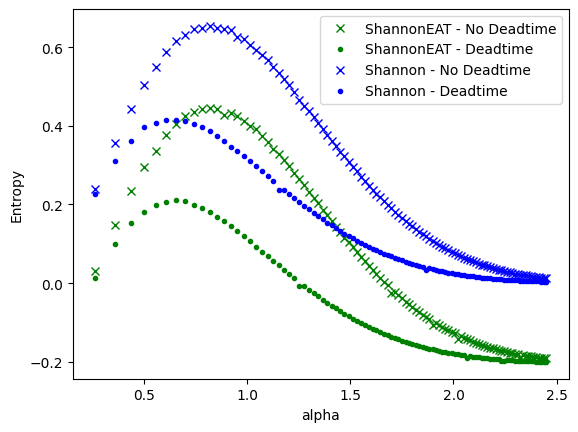

In [9]:
plt.figure()
plt.plot(alphas, res1e['vals'], 'gx', label='ShannonEAT - No Deadtime')
plt.plot(alphas, res2e['vals'], 'g.', label='ShannonEAT - Deadtime')
plt.plot(alphas, res1['vals'], 'bx', label='Shannon - No Deadtime')
plt.plot(alphas, res2['vals'], 'b.', label='Shannon - Deadtime')
plt.xlabel('alpha')
plt.ylabel('Entropy')
plt.legend()

In [ ]:
res1e_ = {'deltas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    ps = []
    delta = 0.0
    for i in range(5):
        delta, p = simulation.doSimul(alpha, 1/2, '2', 100000, 0.77, False)
        ps.append(p[0])
    val = ShannonEAT.getH(ps, 100000, delta, 1/2)
    res1e_['vals'].append(val)
    res1e_['deltas'].append(delta)

with open('Results/ShannonEAT2_077_NoDT.json', 'w') as f:
    json.dump(res1e_, f)

KeyboardInterrupt: 

In [ ]:
res2e_ = {'deltas': [], 'vals': []}
alphas = np.linspace(0.07, 6, 100)

for alpha in alphas:
    alpha = sqrt(alpha)
    ps = []
    delta = 0.0
    for i in range(5):
        delta, p = simulation.doSimul(alpha, 1/2, '2', 100000, 0.77, True)
        ps.append(p[0])
    val = ShannonEAT.getH(ps, 100000, delta, 1/2)
    res2e_['vals'].append(val)
    res2e_['deltas'].append(delta)

with open('Results/ShannonEAT2_077_DT.json', 'w') as f:
    json.dump(res2e_, f)

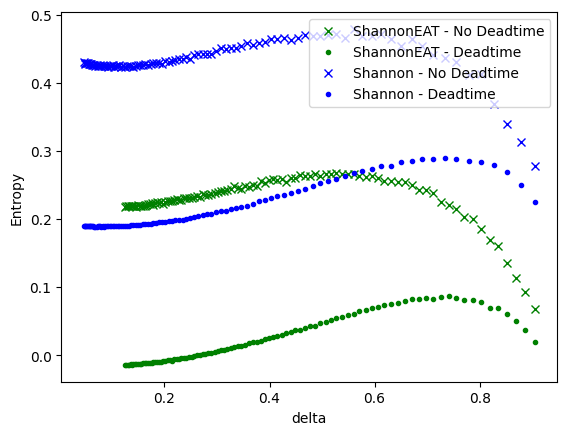

In [ ]:
plt.figure()
plt.plot(res1e_['deltas'], res1e_['vals'], 'gx', label='ShannonEAT - No Deadtime')
plt.plot(res2e_['deltas'], res2e_['vals'], 'g.', label='ShannonEAT - Deadtime')
plt.plot(res_1['deltas'], res_1['vals'], 'bx', label='Shannon - No Deadtime')
plt.plot(res_2['deltas'], res_2['vals'], 'b.', label='Shannon - Deadtime')
plt.xlabel('delta')
plt.ylabel('Entropy')
plt.legend()